In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ECG_function import *
%matplotlib inline

## Data Importing

In [2]:
Xtrain,Ytrain,Xtest = DataImporting()
lable = Ytrain.TARGET.values

## Feature Collection

In [221]:
import pywt
from scipy.fftpack import dct

AllFeatures_wt_fft = [[[[],[]] for k in range(12)   ] for i in range(1000)]
AllFeatures_fft = [[[]for k in range(12)]for id in range(1000) ]
AllFeatures_wt = [[[]for k in range(12)]for id in range(1000) ]
for id in range(1000):
    for k in range(12):
        
        AllFeatures_wt_fft[id][k] = dct(list(pywt.dwt(DataSample(Xtrain,id,k+1).values, 'db2')),norm = "ortho")
        AllFeatures_fft[id][k] = dct(DataSample(Xtrain,id,k+1),norm = "ortho")
        AllFeatures_wt[id][k] = list(pywt.dwt(DataSample(Xtrain,id,k+1).values, 'db2'))

## comparasion

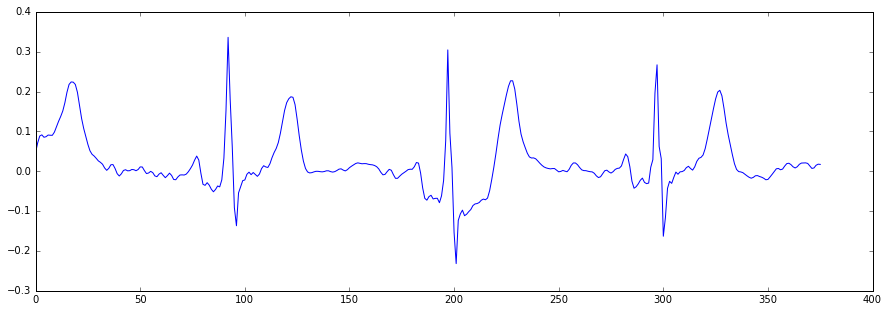

In [251]:
channel = 1
testid = [4]
plt.figure(figsize=[15,5])
for id in testid:
    plt.plot(AllFeatures_wt[id][channel-1][0])

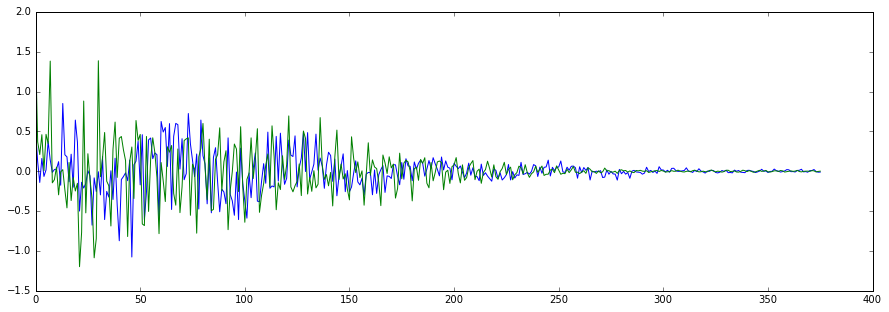

In [186]:
plt.figure(figsize=[15,5])
for id in testid:
    plt.plot(AllFeatures_wt_fft[id][channel-1][0])

In [28]:
Ytrain[0:10]

,ID,TARGET
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0
5,5,1
6,6,0
7,7,0
8,8,1
9,9,1


# Cut the wave !
we will choose features AllFeatures_wt.

In [256]:
id = 1
channel = 10
num_peak = 5
a = np.abs(AllFeatures_wt[id][channel-1][0][125:250]).argsort()[-num_peak:][::-1]

In [257]:
print a
AllFeatures_wt[id][channel-1][0][a]

[110 111 109 113   0]


array([ 0.03983238,  0.04000183,  0.03629344, -0.05578198, -0.00213658])